Pair    CommonNbrs  Jaccard     Adamic-Adar
('A', 'E')2           0.500       1.632
('C', 'E')1           0.250       0.721
('B', 'F')1           0.333       0.910

Ranking by Jaccard Coefficient:
1. ('A', 'E') — score=0.500
2. ('B', 'F') — score=0.333
3. ('C', 'E') — score=0.250


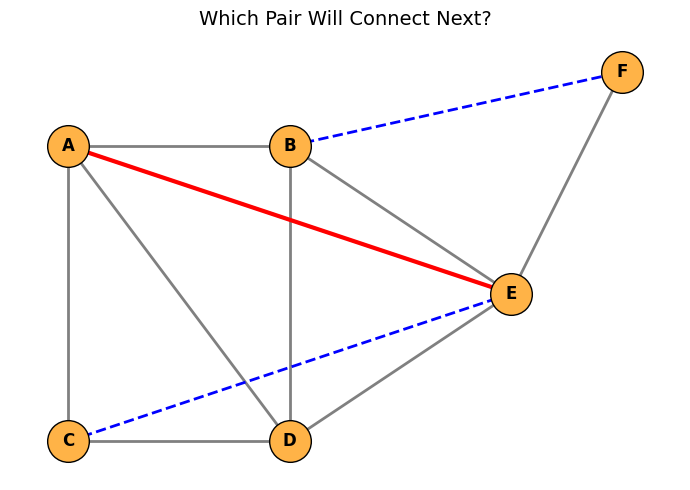

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Step 1: Define the existing network ---
G = nx.Graph()
edges = [
    ('A', 'C'),
    ('A', 'B'),
    ('B', 'D'),
    ('C', 'D'),
    ('B', 'E'),
    ('A', 'D'),
    ('D', 'E'),
    ('E', 'F')
]
G.add_edges_from(edges)

# --- Step 2: Define candidate (possible future) links ---
candidates = [('A', 'E'), ('C', 'E'), ('B', 'F')]

# --- Step 3: Compute similarity metrics ---
def common_neighbors_score(u, v):
    return len(list(nx.common_neighbors(G, u, v)))

# Jaccard and Adamic-Adar
jaccard_scores = {(u, v): score for u, v, score in nx.jaccard_coefficient(G, candidates)}
adamic_scores = {(u, v): score for u, v, score in nx.adamic_adar_index(G, candidates)}

# --- Step 4: Print results ---
print(f"{'Pair':<8}{'CommonNbrs':<12}{'Jaccard':<12}{'Adamic-Adar'}")
for pair in candidates:
    print(f"{pair!s:<8}{common_neighbors_score(*pair):<12}{jaccard_scores[pair]:<12.3f}{adamic_scores[pair]:.3f}")

ranked = sorted(jaccard_scores.items(), key=lambda x: x[1], reverse=True)
print("\nRanking by Jaccard Coefficient:")
for i, (pair, score) in enumerate(ranked, 1):
    print(f"{i}. {pair} — score={score:.3f}")

# --- Step 5: Visualization matching the slide layout ---
pos = {
    'A': (0, 2),
    'B': (2, 2),
    'C': (0, 0),
    'D': (2, 0),
    'E': (4, 1),
    'F': (5, 2.5)
}

plt.figure(figsize=(7, 5))

# Existing nodes & edges
nx.draw_networkx_nodes(G, pos, node_size=900, node_color="#FFB347", edgecolors="black")
nx.draw_networkx_labels(G, pos, font_weight="bold")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color="gray")

# Candidate edges (dashed blue)
nx.draw_networkx_edges(G, pos, edgelist=candidates, edge_color="blue", style="dashed", width=2)

# Highlight top predicted edge (solid red)
top_edge = ranked[0][0]
nx.draw_networkx_edges(G, pos, edgelist=[top_edge], edge_color="red", width=3)

plt.title("Which Pair Will Connect Next?", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


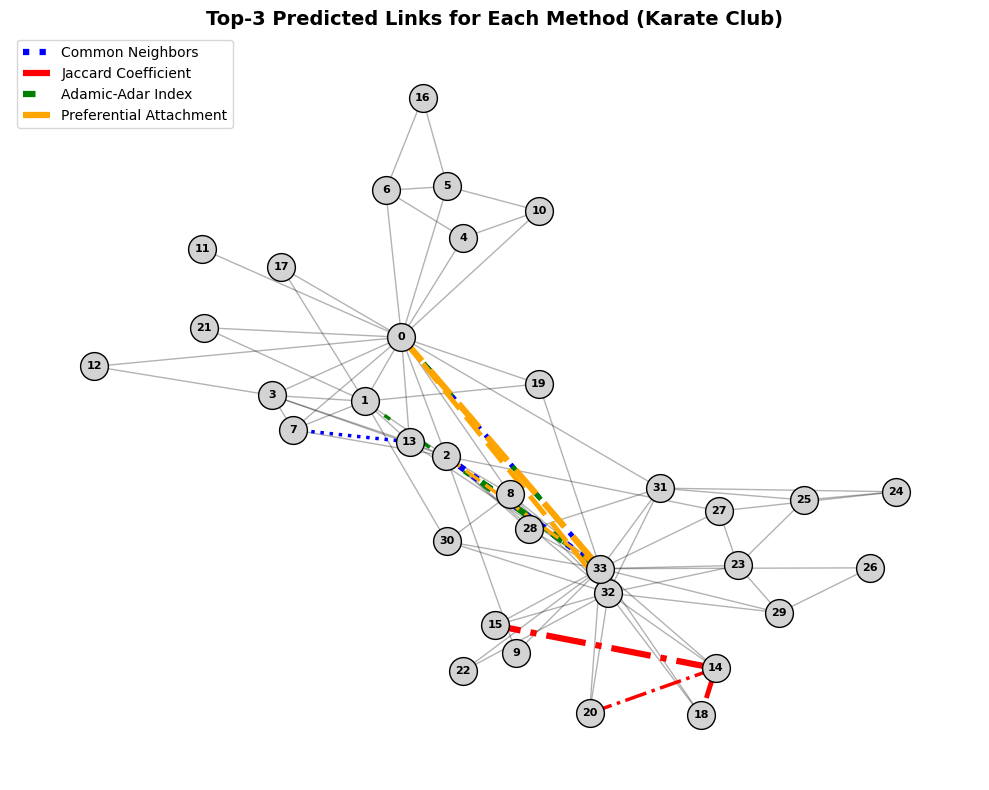

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Load Karate Club graph ---
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)

# --- Generate all non-connected pairs ---
pairs = [(u, v) for u in G.nodes() for v in G.nodes() if u < v and not G.has_edge(u, v)]

# --- Compute top-3 predictions for each method ---
method1 = sorted(pairs, key=lambda x: len(list(nx.common_neighbors(G, *x))), reverse=True)[:3]
method2 = sorted(nx.jaccard_coefficient(G, pairs), key=lambda x: x[2], reverse=True)[:3]
method3 = sorted(nx.adamic_adar_index(G, pairs), key=lambda x: x[2], reverse=True)[:3]
method4 = sorted(nx.preferential_attachment(G, pairs), key=lambda x: x[2], reverse=True)[:3]

# --- Plot network ---
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightgray', edgecolors='black', node_size=400)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# --- Define styles ---
edge_styles = [4.5, 3.5, 2.5]  # thickness for 1st, 2nd, 3rd
method_info = {
    "Common Neighbors": {'color':'blue', 'style':'dotted', 'edges': method1},
    "Jaccard Coefficient": {'color':'red', 'style':'dashdot', 'edges': method2},
    "Adamic-Adar Index": {'color':'green', 'style':(0, (2,5)), 'edges': method3},
    "Preferential Attachment": {'color':'orange', 'style':(0, (5,2)), 'edges': method4}  # corrected
}

# --- Draw top-3 edges for each method ---
for method_name, info in method_info.items():
    for idx, (u, v, *rest) in enumerate(info['edges']):
        nx.draw_networkx_edges(
            G, pos, edgelist=[(u, v)],
            width=edge_styles[idx],
            edge_color=info['color'],
            style=info['style'],
            label=method_name if idx==0 else ""  # label only once
        )

# --- Title and legend ---
plt.title("Top-3 Predicted Links for Each Method (Karate Club)", fontsize=14, weight='bold')
plt.axis('off')
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


In [7]:
import networkx as nx

# Load the Karate Club graph
G = nx.karate_club_graph()

pairs = [(0,32), (0,33), (5,10)]

# Method 1: Common Neighbors
method1 = {(u,v): len(list(nx.common_neighbors(G,u,v))) for u,v in pairs}

# Method 2: Jaccard Coefficient
method2 = {(u,v): score for u,v,score in nx.jaccard_coefficient(G, pairs)}

# Method 3: Adamic-Adar Index
method3 = {(u,v): score for u,v,score in nx.adamic_adar_index(G, pairs)}

# Method 4: Preferential Attachment
method4 = {(u,v): score for u,v,score in nx.preferential_attachment(G, pairs)}

# Print results
print("Pair\tM1\tM2\tM3\tM4")
for u,v in pairs:
    print(f"{u}-{v}\t{method1[(u,v)]}\t{method2[(u,v)]:.2f}\t"
          f"{method3[(u,v)]:.2f}\t{method4[(u,v)]:.0f}")


Pair	M1	M2	M3	M4
0-32	3	0.12	1.61	192
0-33	4	0.14	2.71	272
5-10	1	0.17	0.36	12


ROC AUC: 0.6848958333333334

Classification Report:
               precision    recall  f1-score   support

           0      0.600     0.625     0.612        24
           1      0.609     0.583     0.596        24

    accuracy                          0.604        48
   macro avg      0.604     0.604     0.604        48
weighted avg      0.604     0.604     0.604        48

Top predicted edges for time 2:
0-5: 1.000
0-16: 1.000
0-19: 1.000
0-32: 1.000
0-33: 1.000


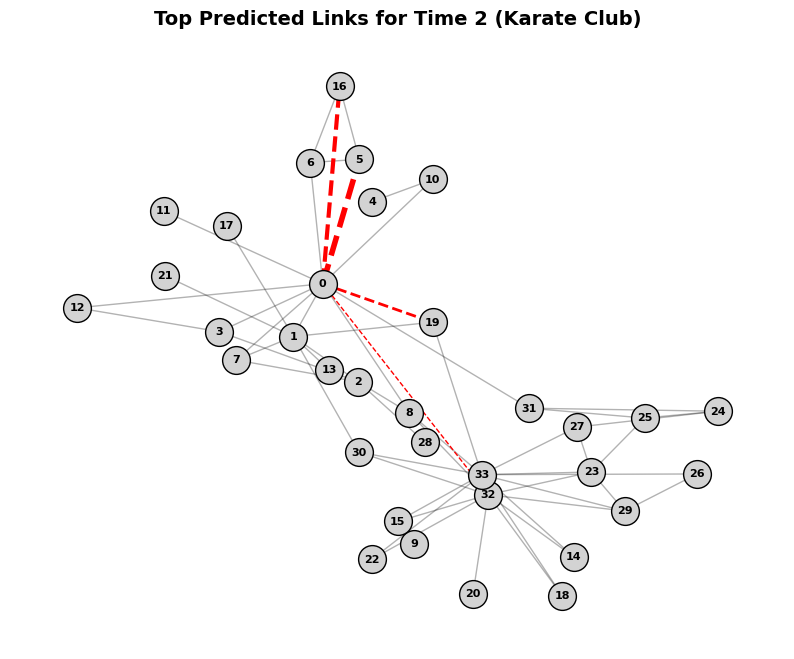

In [19]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# -------------------------------
# 1. Load Karate Club and simulate temporal split
# -------------------------------
G = nx.karate_club_graph()
edges = list(G.edges())
random.seed(42)
random.shuffle(edges)

split = int(0.7 * len(edges))  # 70% early edges
edges_t1 = edges[:split]
edges_t2 = edges[split:]

G_t1 = nx.Graph()
G_t1.add_nodes_from(G.nodes())
G_t1.add_edges_from(edges_t1)

future_edges = edges_t2  # edges to predict

# -------------------------------
# 2. Feature extraction function
# -------------------------------
def extract_features(G, u, v):
    neighbors_u = set(G.neighbors(u))
    neighbors_v = set(G.neighbors(v))
    cn = len(neighbors_u & neighbors_v)          # Common Neighbors
    union = len(neighbors_u | neighbors_v)
    jaccard = cn / union if union > 0 else 0    # Jaccard Coefficient
    pa = len(neighbors_u) * len(neighbors_v)    # Preferential Attachment
    return [cn, jaccard, pa]

# -------------------------------
# 3. Prepare training data
# -------------------------------
X_train, y_train = [], []

# Positive examples: edges in G_t1
for u, v in G_t1.edges():
    X_train.append(extract_features(G_t1, u, v))
    y_train.append(1)

# Negative examples: same number of non-edges
non_edges_train = list(nx.non_edges(G_t1))
neg_edges_train = random.sample(non_edges_train, len(G_t1.edges()))
for u, v in neg_edges_train:
    X_train.append(extract_features(G_t1, u, v))
    y_train.append(0)

# -------------------------------
# 4. Prepare test data
# -------------------------------
X_test, y_test = [], []

# Positive examples: future edges
for u, v in future_edges:
    X_test.append(extract_features(G_t1, u, v))
    y_test.append(1)

# Negative examples: random non-edges
non_edges_test = list(nx.non_edges(G_t1))
neg_edges_test = random.sample(non_edges_test, len(future_edges))
for u, v in neg_edges_test:
    X_test.append(extract_features(G_t1, u, v))
    y_test.append(0)

# -------------------------------
# 5. Train Random Forest
# -------------------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities on test set
y_prob = clf.predict_proba(X_test)[:,1]
y_pred = clf.predict(X_test)

# Evaluation
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# -------------------------------
# 6. Predict all possible future links and rank top-k
# -------------------------------
all_non_edges = list(nx.non_edges(G_t1))
X_all, edge_pairs = [], []
for u, v in all_non_edges:
    X_all.append(extract_features(G_t1, u, v))
    edge_pairs.append((u, v))

probs = clf.predict_proba(X_all)[:,1]
top_k = sorted(zip(edge_pairs, probs), key=lambda x: x[1], reverse=True)[:5]

print("Top predicted edges for time 2:")
for (u, v), p in top_k:
    print(f"{u}-{v}: {p:.3f}")

# -------------------------------
# 7. Plot network and top predictions
# -------------------------------
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G_t1, pos, node_color='lightgray', edgecolors='black', node_size=400)
nx.draw_networkx_edges(G_t1, pos, width=1, alpha=0.3)
nx.draw_networkx_labels(G_t1, pos, font_size=8, font_weight='bold')

# Draw top predicted edges
for idx, ((u,v), p) in enumerate(top_k):
    width = 4 - idx  # thickest = top prediction
    nx.draw_networkx_edges(G_t1, pos, edgelist=[(u,v)], edge_color='red', width=width, style='dashed')

plt.title("Top Predicted Links for Time 2 (Karate Club)", fontsize=14, weight='bold')
plt.axis('off')
plt.show()
